In [25]:
import scanpy as sc
import scvi
import warnings
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
sc.set_figure_params(figsize=(4, 4))
import numpy as np
import torch
import anndata
%matplotlib inline  
import sys
sys.path.append('..')
from functions import *

In [5]:
adata = anndata.read_h5ad(filename="../data/adataLung4.h5ad")
scvi.model.SCVI.setup_anndata(adata, layer="counts")

In [6]:
vaeSN = trainModelPostVis(adata,"sdnormal")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [11:20<00:00,  1.77s/it, v_num=1, train_loss_step=952, train_loss_epoch=932]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [11:20<00:00,  1.70s/it, v_num=1, train_loss_step=952, train_loss_epoch=932]


In [7]:
vaeMG = trainModelPostVis(adata,"mixofgaus")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:28<00:00,  2.07s/it, v_num=1, train_loss_step=995, train_loss_epoch=931]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:28<00:00,  2.02s/it, v_num=1, train_loss_step=995, train_loss_epoch=931]


In [8]:
vaeVP = trainModelPostVis(adata,"vamp")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [14:51<00:00,  2.25s/it, v_num=1, train_loss_step=939, train_loss_epoch=930]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [14:51<00:00,  2.23s/it, v_num=1, train_loss_step=939, train_loss_epoch=930]


In [9]:
vaeNF = trainModelPostVis(adata,"normalflow")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [23:35<00:00,  3.59s/it, v_num=1, train_loss_step=947, train_loss_epoch=931]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [23:35<00:00,  3.54s/it, v_num=1, train_loss_step=947, train_loss_epoch=931]


In [11]:
vaeSN.save("models/PPV_StandardNormal")
vaeMG.save("models/PPV_MixtureOfGaussians")
vaeVP.save("models/PPV_Vamp")
vaeNF.save("models/PPV_NormalFlow")

In [12]:
vaeSN = scvi.model.SCVI.load("models/PPV_StandardNormal",adata=adata)
vaeMG = scvi.model.SCVI.load("models/PPV_MixtureOfGaussians",adata=adata)
vaeVP = scvi.model.SCVI.load("models/PPV_Vamp",adata=adata)
vaeNF = scvi.model.SCVI.load("models/PPV_NormalFlow",adata=adata)

INFO     File models/PPV_StandardNormal/model.pt already downloaded                                                
INFO     File models/PPV_MixtureOfGaussians/model.pt already downloaded                                            
INFO     File models/PPV_Vamp/model.pt already downloaded                                                          
INFO     File models/PPV_NormalFlow/model.pt already downloaded                                                    


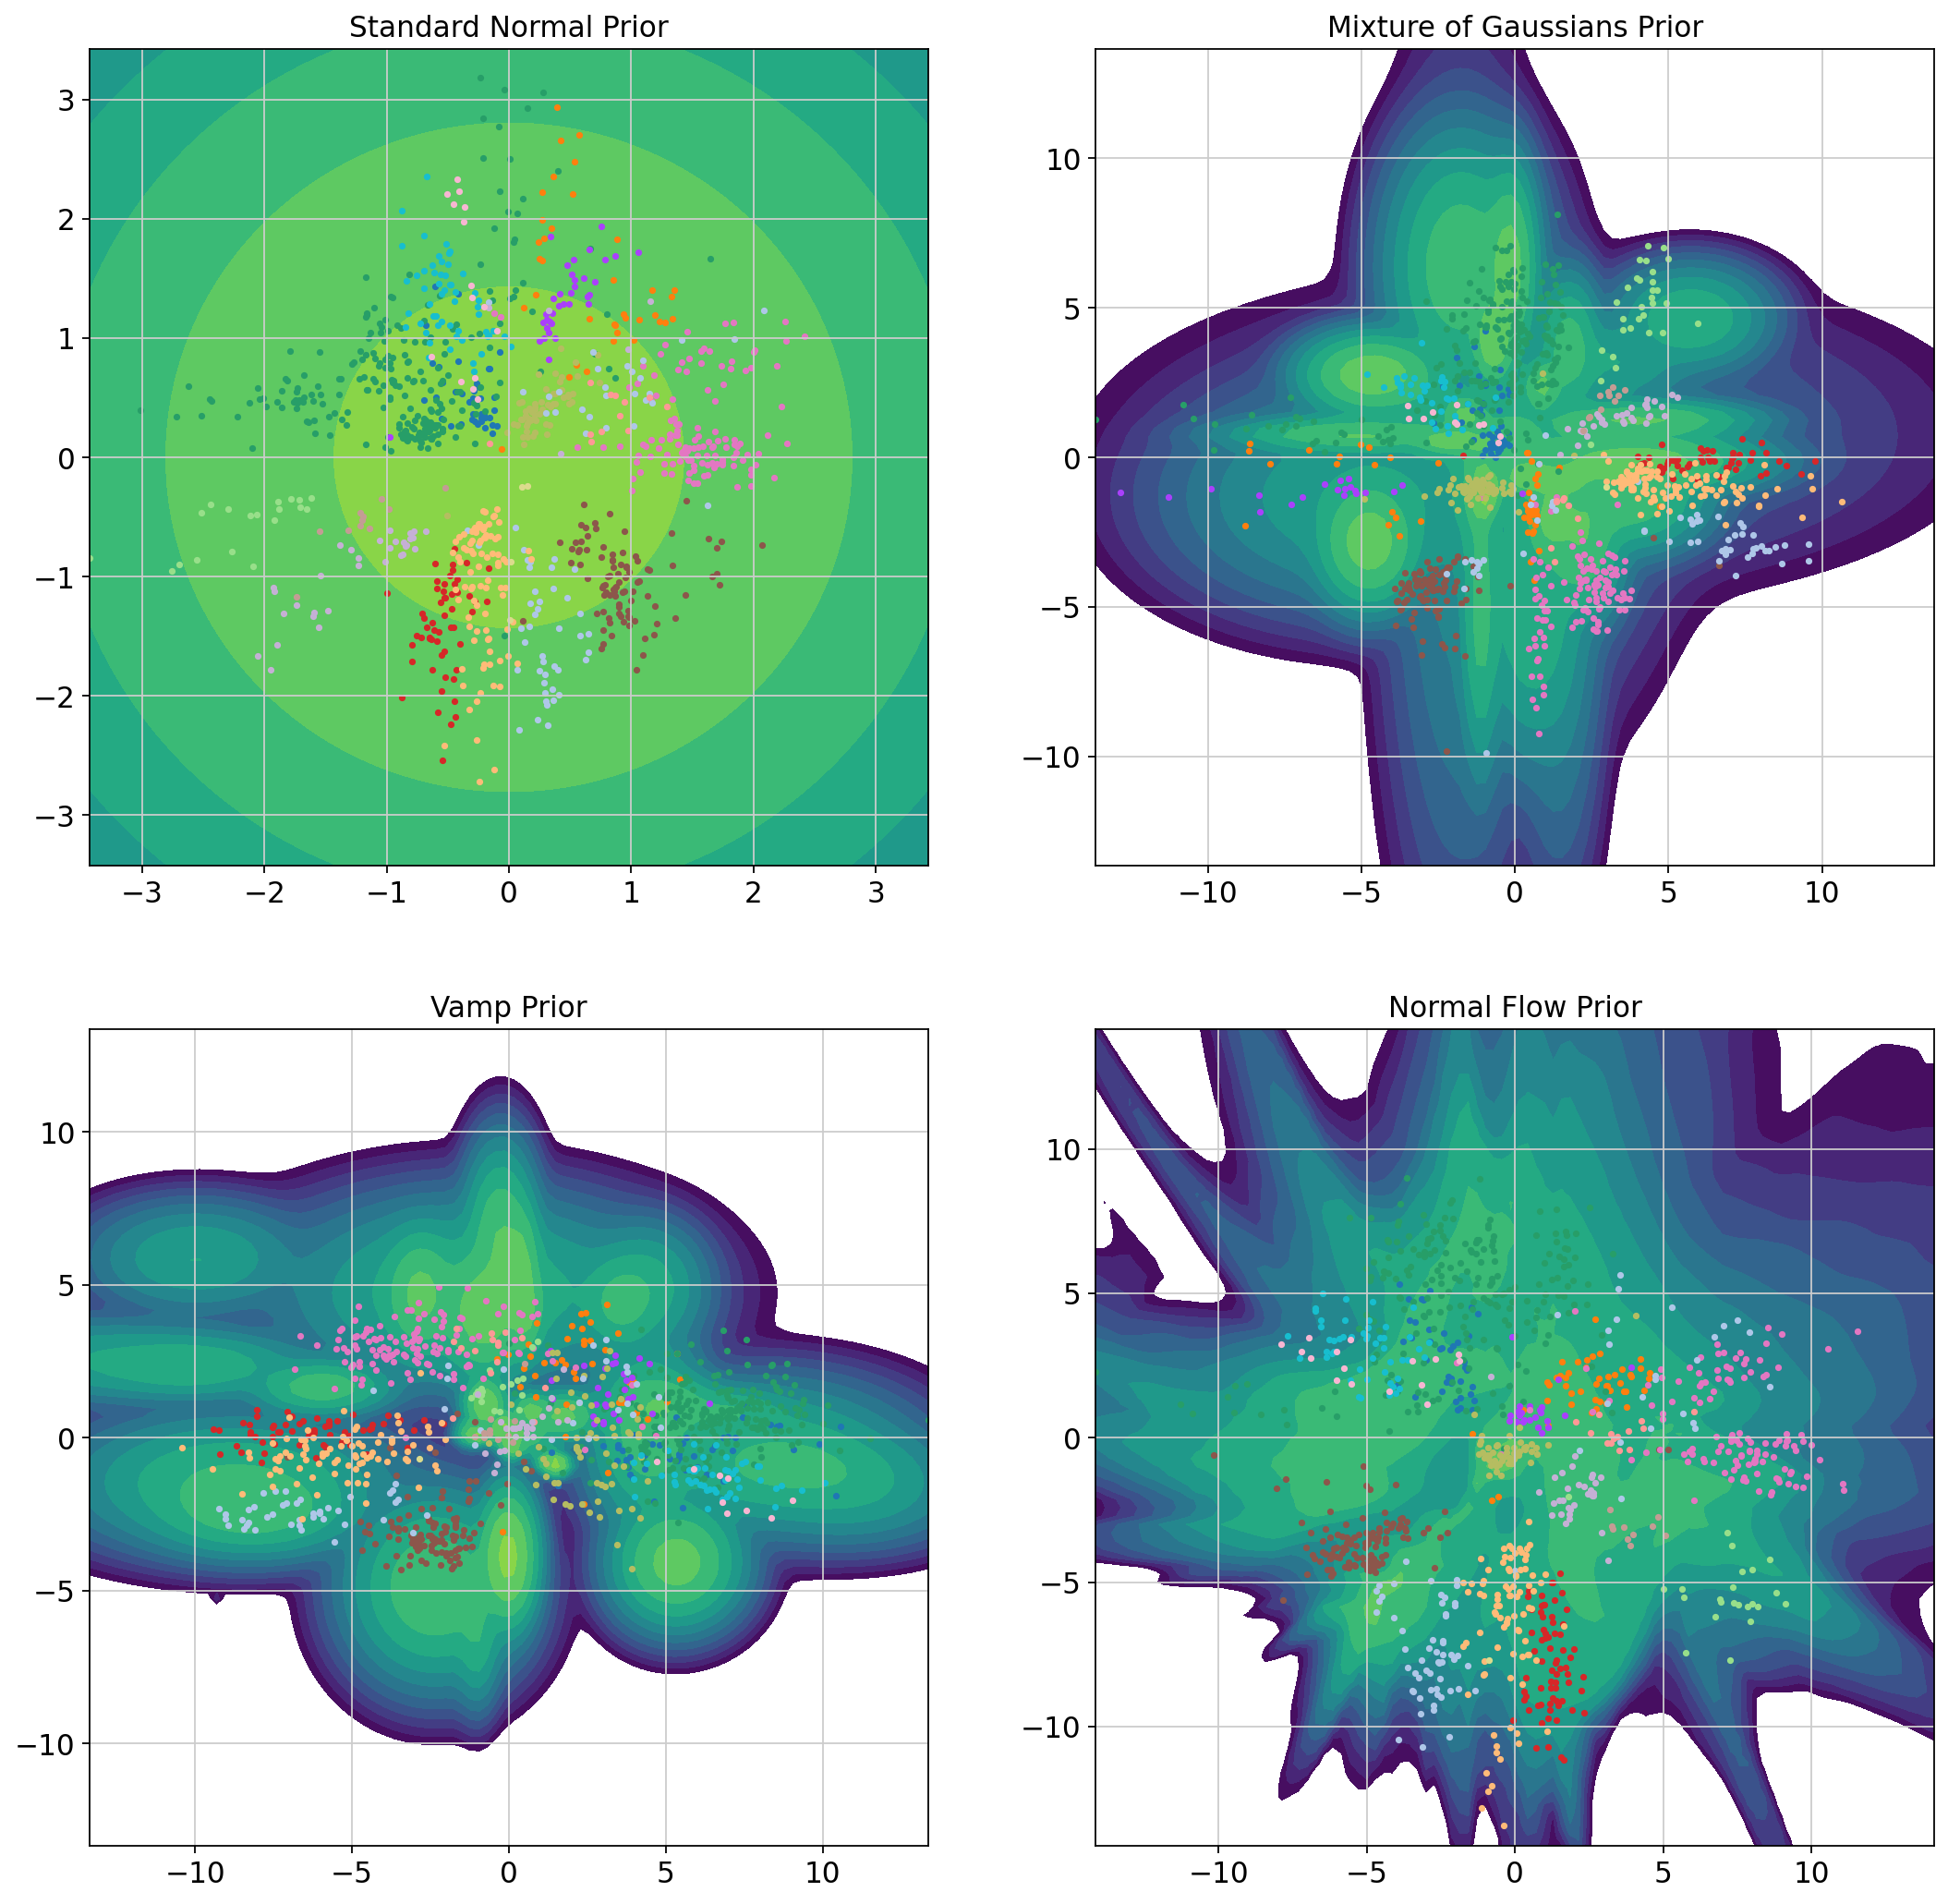

In [37]:
posteriorVisualizationAll(adata, vaeSN, vaeMG, vaeVP, vaeNF)

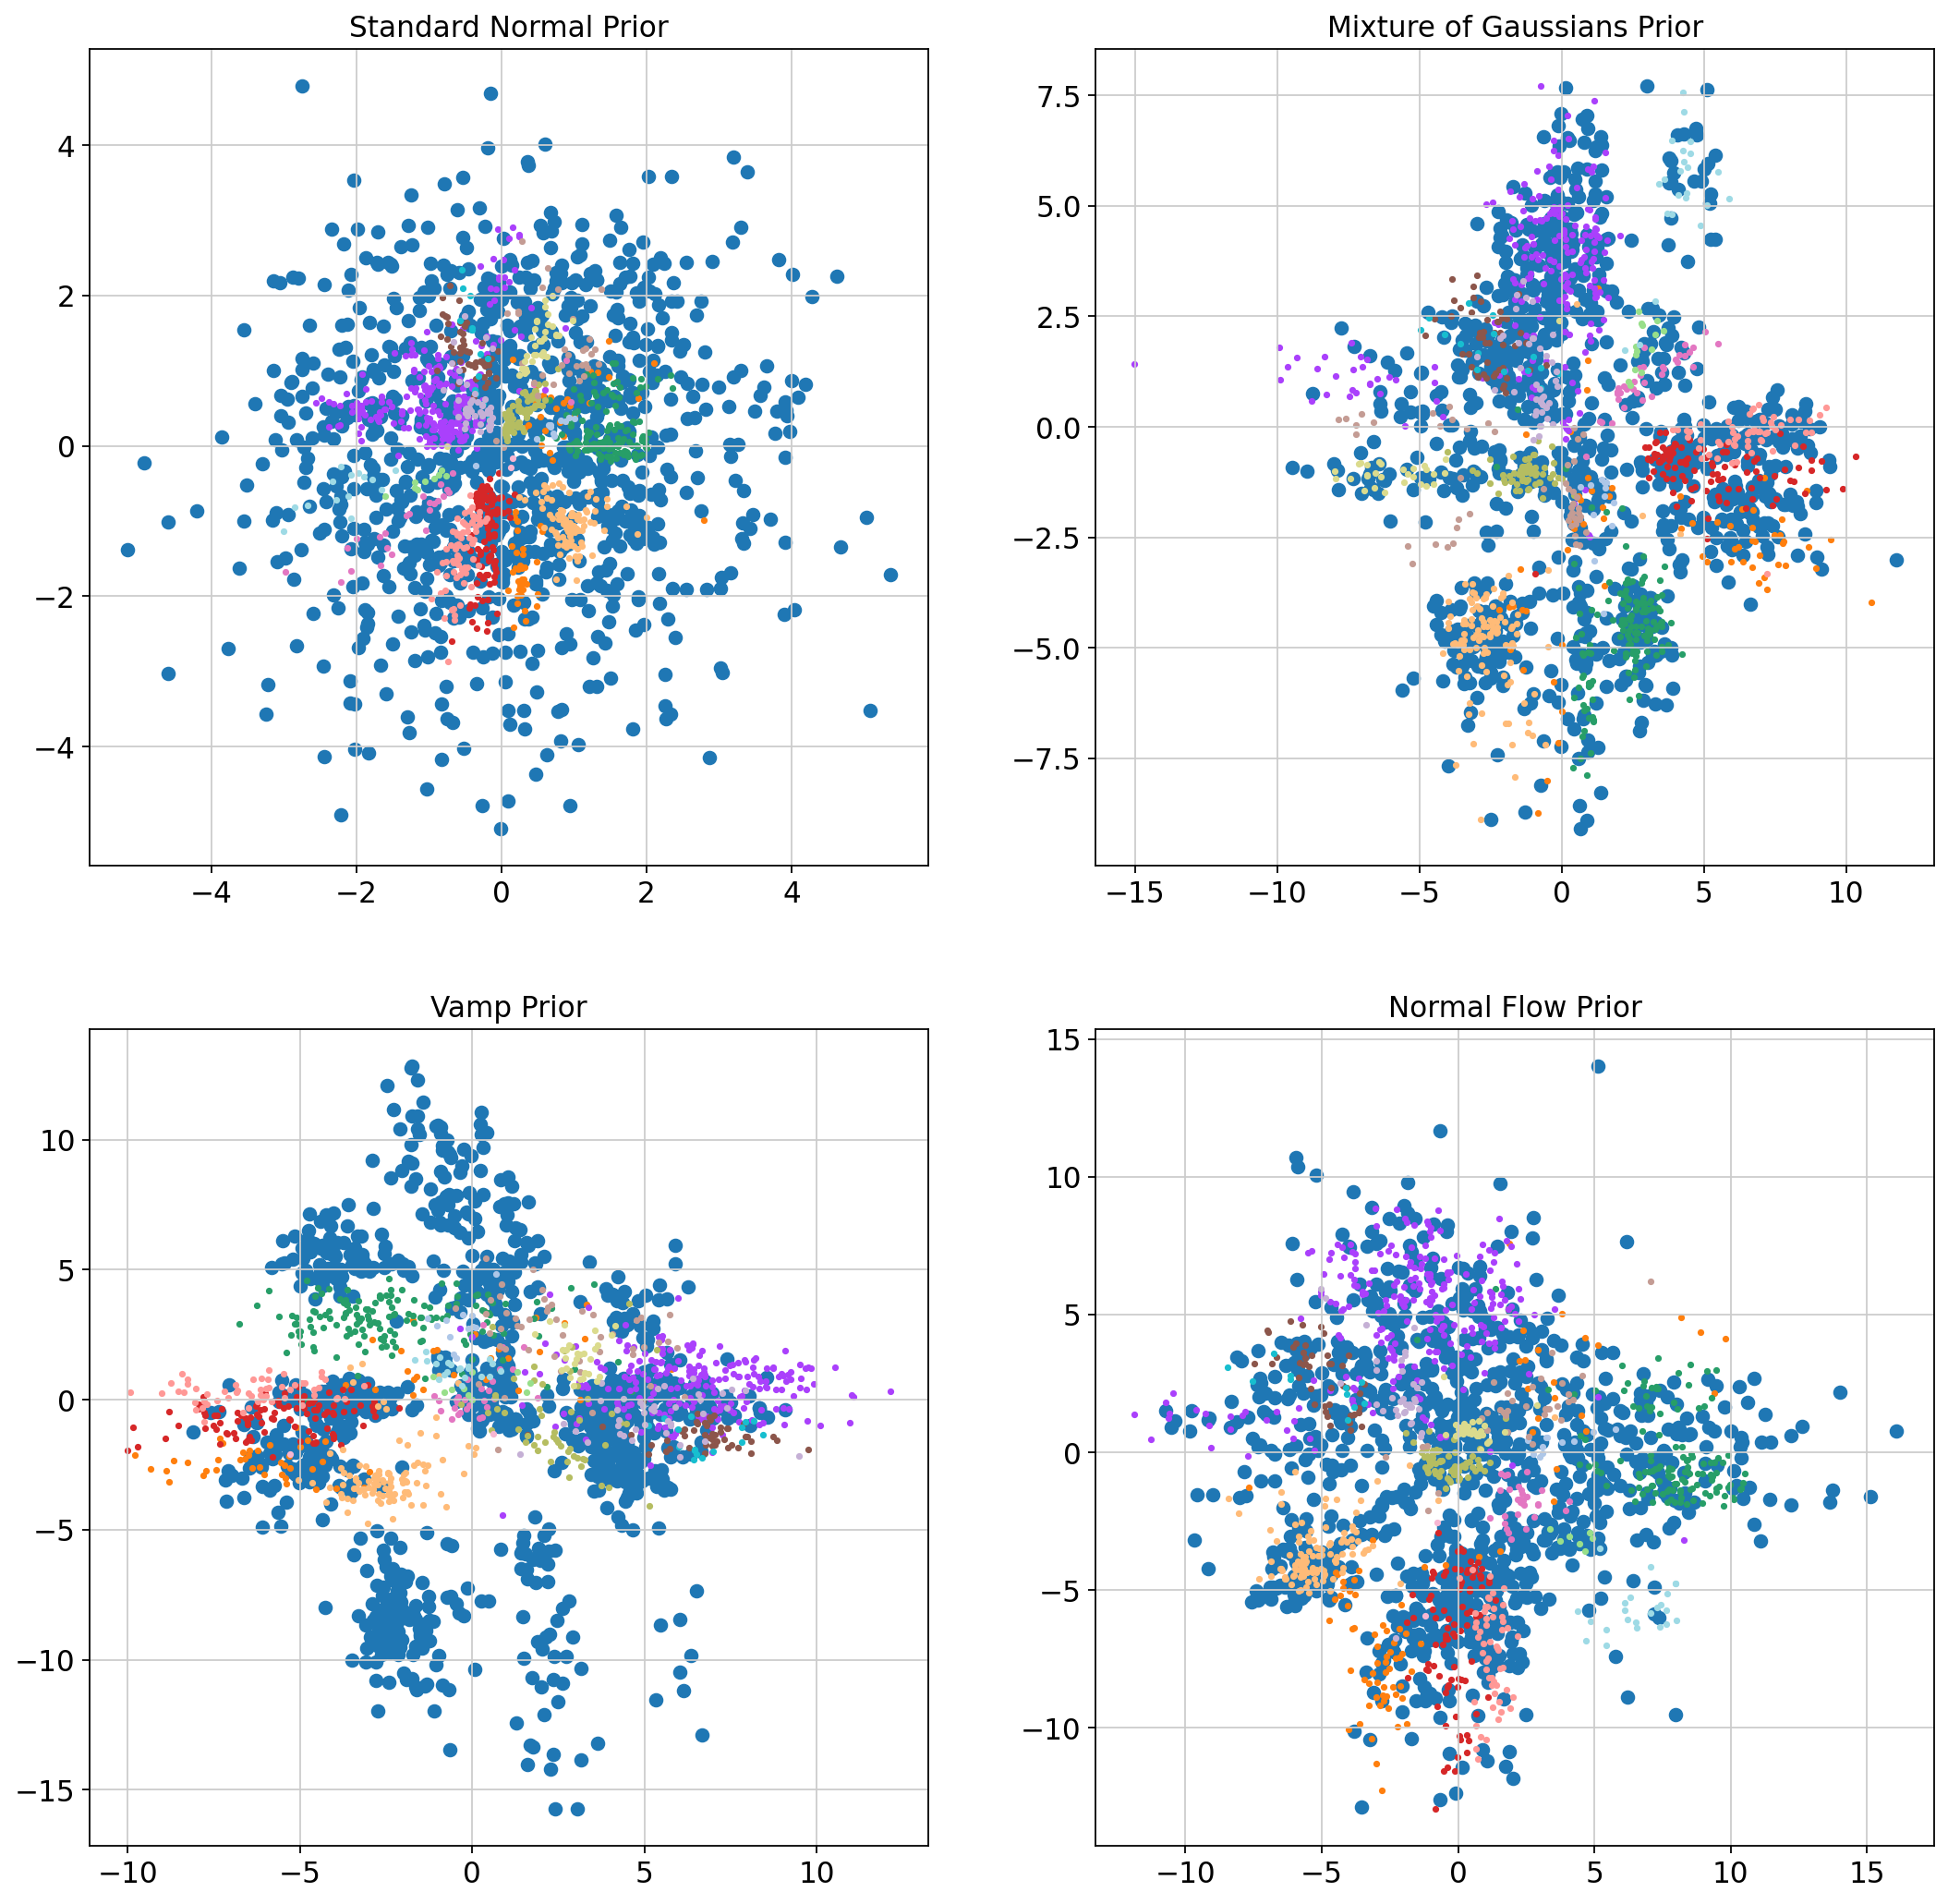

In [46]:
posteriorVisualizationAll(adata, vaeSN, vaeMG, vaeVP, vaeNF, True)

In [3]:
adata = scvi.data.heart_cell_atlas_subsampled()
sc.pp.filter_genes(adata, min_counts=3)
adata.layers["counts"] = adata.X.copy()  # preserve counts
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata  # freeze the state in `.raw`
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=1200,
    subset=True,
    layer="counts",
    flavor="seurat_v3",
    batch_key="cell_source",
)
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["cell_source", "donor"],
    continuous_covariate_keys=["percent_mito", "percent_ribo"]
)

INFO     Downloading file at data/hca_subsampled_20k.h5ad                                                          
Downloading...:  22%|██▏       | 14618/65714.0 [00:00<00:00, 80435.36it/s]


KeyboardInterrupt: 

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
